In [1]:
#Biggest circle on a surface with obstacles
#max pi* R^2
#such that:
#         (X - xj)^2 + (Y - yj)^2 >= R^2
#         X >= R
#         Y >= R
#         Y <= 1-R
#         X <= 1-R

In [ ]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
model = AbstractModel()
model.N = Param(mutable=True)
model.i = RangeSet(1, model.N)

def initval(model, i):
    return random.uniform(0, 1)

model.Xloc = Param(model.i, within=NonNegativeReals, initialize=initval, mutable=True)
model.Yloc = Param(model.i, within=NonNegativeReals, initialize=initval, mutable=True)
model.x = Var(bounds=(0, 1), within=NonNegativeReals, initialize = 0.1)
model.y = Var(bounds=(0, 1), within=NonNegativeReals, initialize = 0.3)
model.r = Var(bounds=(0, 1), within=NonNegativeReals, initialize = 0.5)
model.area = Var(bounds=(0, 1), within=NonNegativeReals, initialize = 0)

#make sure every obstacle is outside the circle
def rule_C2(model, i):
    return (model.x-model.Xloc[i])**2 + (model.y-model.Yloc[i])**2 >= model.r**2
model.C2 = Constraint(model.i, rule=rule_C2)

#make sure x is bigger than R
def rule_C3(model):
    return model.x >= model.r
model.C3 = Constraint(rule=rule_C3)

#make sure y is bigger than R
def rule_C4(model):
    return model.y >= model.r
model.C4 = Constraint(rule=rule_C4)

#make sure y is less than or equal to 1-R
def rule_C5(model):
    return model.y <= 1 - model.r
model.C5 = Constraint(rule=rule_C5)

#make sure x is less than or equal to 1-R
def rule_C6(model):
    return model.x <= 1 - model.r
model.C6 = Constraint(rule=rule_C6)


def rule_obj(model):
    return model.area == np.pi*model.r**2
model.C7 = Constraint(rule=rule_obj)

model.obj1 = Objective(expr=model.area, sense=maximize)
opt = SolverFactory('ipopt')
#instance.display()

In [7]:
model.N = 50
instance = model.create_instance()

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)


r=  0.1770
x=  0.1770
y=  0.2645


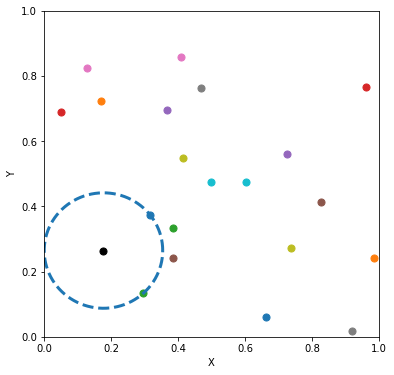

In [6]:
fig = plt.figure(figsize=(6, 6))
for i in instance.i:
    plt.scatter(value(instance.Xloc[i]), value(instance.Yloc[i]), s=50)

results = opt.solve(instance) #solves and updates instance

print('r= ', '%5.4f'% value(instance.r))
print('x= ', '%5.4f'% value(instance.x))
print('y= ', '%5.4f'% value(instance.y))

theta = np.linspace(0, 2*np.pi, 100)
Xc = value(instance.x) + value(instance.r)*np.cos(theta)
Yc = value(instance.y) + value(instance.r)*np.sin(theta)
plt.plot(Xc, Yc, '--', lw=3)
plt.scatter(value(instance.x), value(instance.y), color='black', s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()